
# 📌 Challenge Telecom X — Parte 2
**Objetivo:** construir modelos predictivos para **churn** usando los datos **tratados en la Parte 1**.

- Repositorio anterior (Parte 1): https://github.com/luccii591/challenge_TelecomX  


## 🔧 Setup (instalación de paquetes y configuración)

In [ ]:

# Si estás en Google Colab, instala/actualiza dependencias necesarias
# (si ya están instaladas no pasa nada)
!pip -q install imbalanced-learn==0.12.3 scikit-learn==1.5.1 seaborn==0.13.2

import os, sys, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from IPython.display import display
sns.set()
SEED = 42
np.random.seed(SEED)

print("Versions ->",
      "pandas", pd.__version__,
      "| sklearn", __import__("sklearn").__version__,
      "| imblearn", __import__("imblearn").__version__,
      "| seaborn", sns.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.1 which is incompatible.
Versions -> pandas 2.2.2 | sklearn 1.5.1 | imblearn 0.12.3 | seaborn 0.13.2


# Preparación de los Datos:

## BACKLOG 2: Cargar archivo tratado de la Parte 1

In [ ]:
#Cargar archivo
url_raw = "https://raw.githubusercontent.com/luccii591/challenge_TelecomX_Parte2/main/datos_tratados.csv"

try:
    df = pd.read_csv(url_raw)
    print("✅ Dataset cargado correctamente desde GitHub RAW")
except Exception as e:
    print("❌ No se pudo leer desde GitHub RAW:", e)
    df = None

assert df is not None, "No se encontró el archivo. Verifica que el link RAW sea correcto."

print("Dimensiones del dataset:", df.shape)
display(df.head())
display(df.sample(5, random_state=SEED))
display(df.info())


✅ Dataset cargado correctamente desde GitHub RAW
Dimensiones del dataset: (7267, 16)


,ID_Cliente,Abandono,Servicio_Internet,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Adicionales,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0.0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,1,1,9,1,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,0,0,9,1,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,0,0,4,1,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,1,0,13,1,No,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,1,0,3,1,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


,ID_Cliente,Abandono,Servicio_Internet,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Adicionales,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
1414,2038-OEQZH,0.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,0,0,4,1,No,Month-to-month,0,Electronic check,86.05,308.10,2.868333
4610,6322-HRPFA,0.0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,1,1,49,1,No,Month-to-month,0,Credit card (automatic),59.60,2970.30,1.986667
2862,3969-JQABI,0.0,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,1,0,58,1,No,Month-to-month,1,Credit card (automatic),65.25,3791.60,2.175000
4078,5578-NKCXI,0.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,0,1,1,58,1,No,One year,0,Credit card (automatic),99.25,5846.65,3.308333
3964,5419-JPRRN,1.0,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,0,0,1,1,Yes,Month-to-month,1,Electronic check,101.45,101.45,3.381667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7267 non-null   object 
 1   Abandono               7043 non-null   float64
 2   Servicio_Internet      7267 non-null   object 
 3   Genero                 7267 non-null   object 
 4   Adulto_Mayor           7267 non-null   int64  
 5   Pareja                 7267 non-null   int64  
 6   Dependientes           7267 non-null   int64  
 7   Antiguedad_Meses       7267 non-null   int64  
 8   Servicio_Telefono      7267 non-null   int64  
 9   Lineas_Adicionales     7267 non-null   object 
 10  Contrato               7267 non-null   object 
 11  Facturacion_Sin_Papel  7267 non-null   int64  
 12  Metodo_Pago            7267 non-null   object 
 13  Cargos_Mensuales       7267 non-null   float64
 14  Cargos_Totales         7256 non-null   float64
 15  Carg

None

## BACKLOG 3: Eliminar columnas irrelevantes

In [ ]:

irrelevantes = [c for c in ["customerID", "CustomerID", "id", "ID", "Unnamed: 0"] if c in df.columns]
if irrelevantes:
    print("Eliminando columnas irrelevantes:", irrelevantes)
    df = df.drop(columns=irrelevantes)

# Coerción segura de numéricos típicos si quedaron como texto
for col in ["TotalCharges", "MonthlyCharges", "tenure"]:
    if col in df.columns and df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ".", regex=False), errors="coerce")

# Limpieza básica de strings para evitar espacios raros
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

print("Columnas actuales:", df.columns.tolist())


Columnas actuales: ['ID_Cliente', 'Abandono', 'Servicio_Internet', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Antiguedad_Meses', 'Servicio_Telefono', 'Lineas_Adicionales', 'Contrato', 'Facturacion_Sin_Papel', 'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios']


## BACKLOG 4: Codificación

In [ ]:
# Ajusta el nombre de la variable objetivo aquí si es distinto
TARGET = "Abandono"   # <- en tu dataset está así
assert TARGET in df.columns, f"No se encontró la columna target '{TARGET}' en el dataframe."

# Normalizamos target a 0/1
if df[TARGET].dtype == "object":
    mapa = {
        "yes": 1, "si": 1, "true": 1, "1": 1, "y": 1, "t": 1,
        "no": 0, "false": 0, "0": 0, "n": 0, "f": 0
    }
    df[TARGET] = df[TARGET].str.lower().map(mapa).fillna(df[TARGET])
df[TARGET] = df[TARGET].replace({"Yes": 1, "No": 0})

# Eliminar filas donde Abandono sea NaN
before = df.shape[0]
df = df.dropna(subset=[TARGET])
after = df.shape[0]
print(f"Se eliminaron {before - after} filas con target NaN.")

# Separar X / y
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET])

# Identificar categóricas en X y codificar
cat_cols = X.select_dtypes(include="object").columns.tolist()
print("Categóricas a codificar:", cat_cols)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Dimensiones tras encoding:", X_encoded.shape)

# Imputación simple si queda algún NaN en features
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
X_encoded = pd.DataFrame(imp.fit_transform(X_encoded), columns=X_encoded.columns)

# Revisión
print("NaNs restantes en X_encoded:", int(X_encoded.isna().sum().sum()))
print("Distribución del target:")
print(y.value_counts(normalize=True).rename("proporcion"))


Se eliminaron 224 filas con target NaN.
Categóricas a codificar: ['ID_Cliente', 'Servicio_Internet', 'Genero', 'Lineas_Adicionales', 'Contrato', 'Metodo_Pago']
Dimensiones tras encoding: (7043, 7187)
NaNs restantes en X_encoded: 0
Distribución del target:
Abandono
0    0.73463
1    0.26537
Name: proporcion, dtype: float64


## BACKLOG 5: Verificación de la proporción de Churn

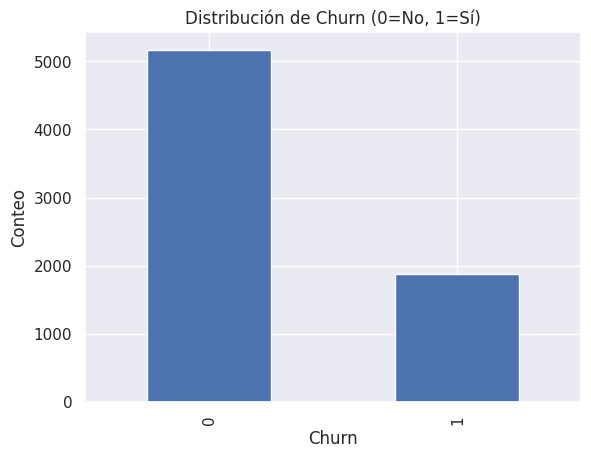

Proporción:
Abandono
0    0.73463
1    0.26537
Name: proporcion, dtype: float64


In [ ]:

ax = y.value_counts().sort_index().plot(kind="bar", title="Distribución de Churn (0=No, 1=Sí)")
plt.xlabel("Churn")
plt.ylabel("Conteo")
plt.show()

print("Proporción:")
print(y.value_counts(normalize=True).rename("proporcion"))


## BACKLOG 6: Balanceo de clases (opcional con SMOTE)

In [ ]:

APLICAR_SMOTE = True  # pon en False si NO quieres balancear

X_bal, y_bal = X_encoded.copy(), y.copy()
if APLICAR_SMOTE:
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=SEED)
    X_bal, y_bal = sm.fit_resample(X_encoded, y)
    print("SMOTE aplicado. Nueva distribución:", y_bal.value_counts(normalize=True).rename("proporcion"))
else:
    print("SMOTE NO aplicado. Distribución original:", y_bal.value_counts(normalize=True).rename("proporcion"))


SMOTE aplicado. Nueva distribución: Abandono
0    0.5
1    0.5
Name: proporcion, dtype: float64


## BACKLOG 7: Normalización / Estandarización (para modelos sensibles a escala)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Escalaremos sólo después del split para evitar fuga de datos (data leakage)
print("Se creará scaler tras el split en BACKLOG 10.")


Se creará scaler tras el split en BACKLOG 10.


# Correlación y Selección de Variables:

## BACKLOG 8: Análisis de Correlación


--- Análisis de Correlación Ultra Optimizado ---


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


📌 Variables más correlacionadas con Churn:
Churn                                                                                                                                                                                                 1.000000
Servicio_Internet_{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'}    0.042127
Servicio_Internet_{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}             0.026320
Servicio_Internet_{'InternetService': 'DSL', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}            0.023042
Metodo_Pago_Mailed check                                                                                                         

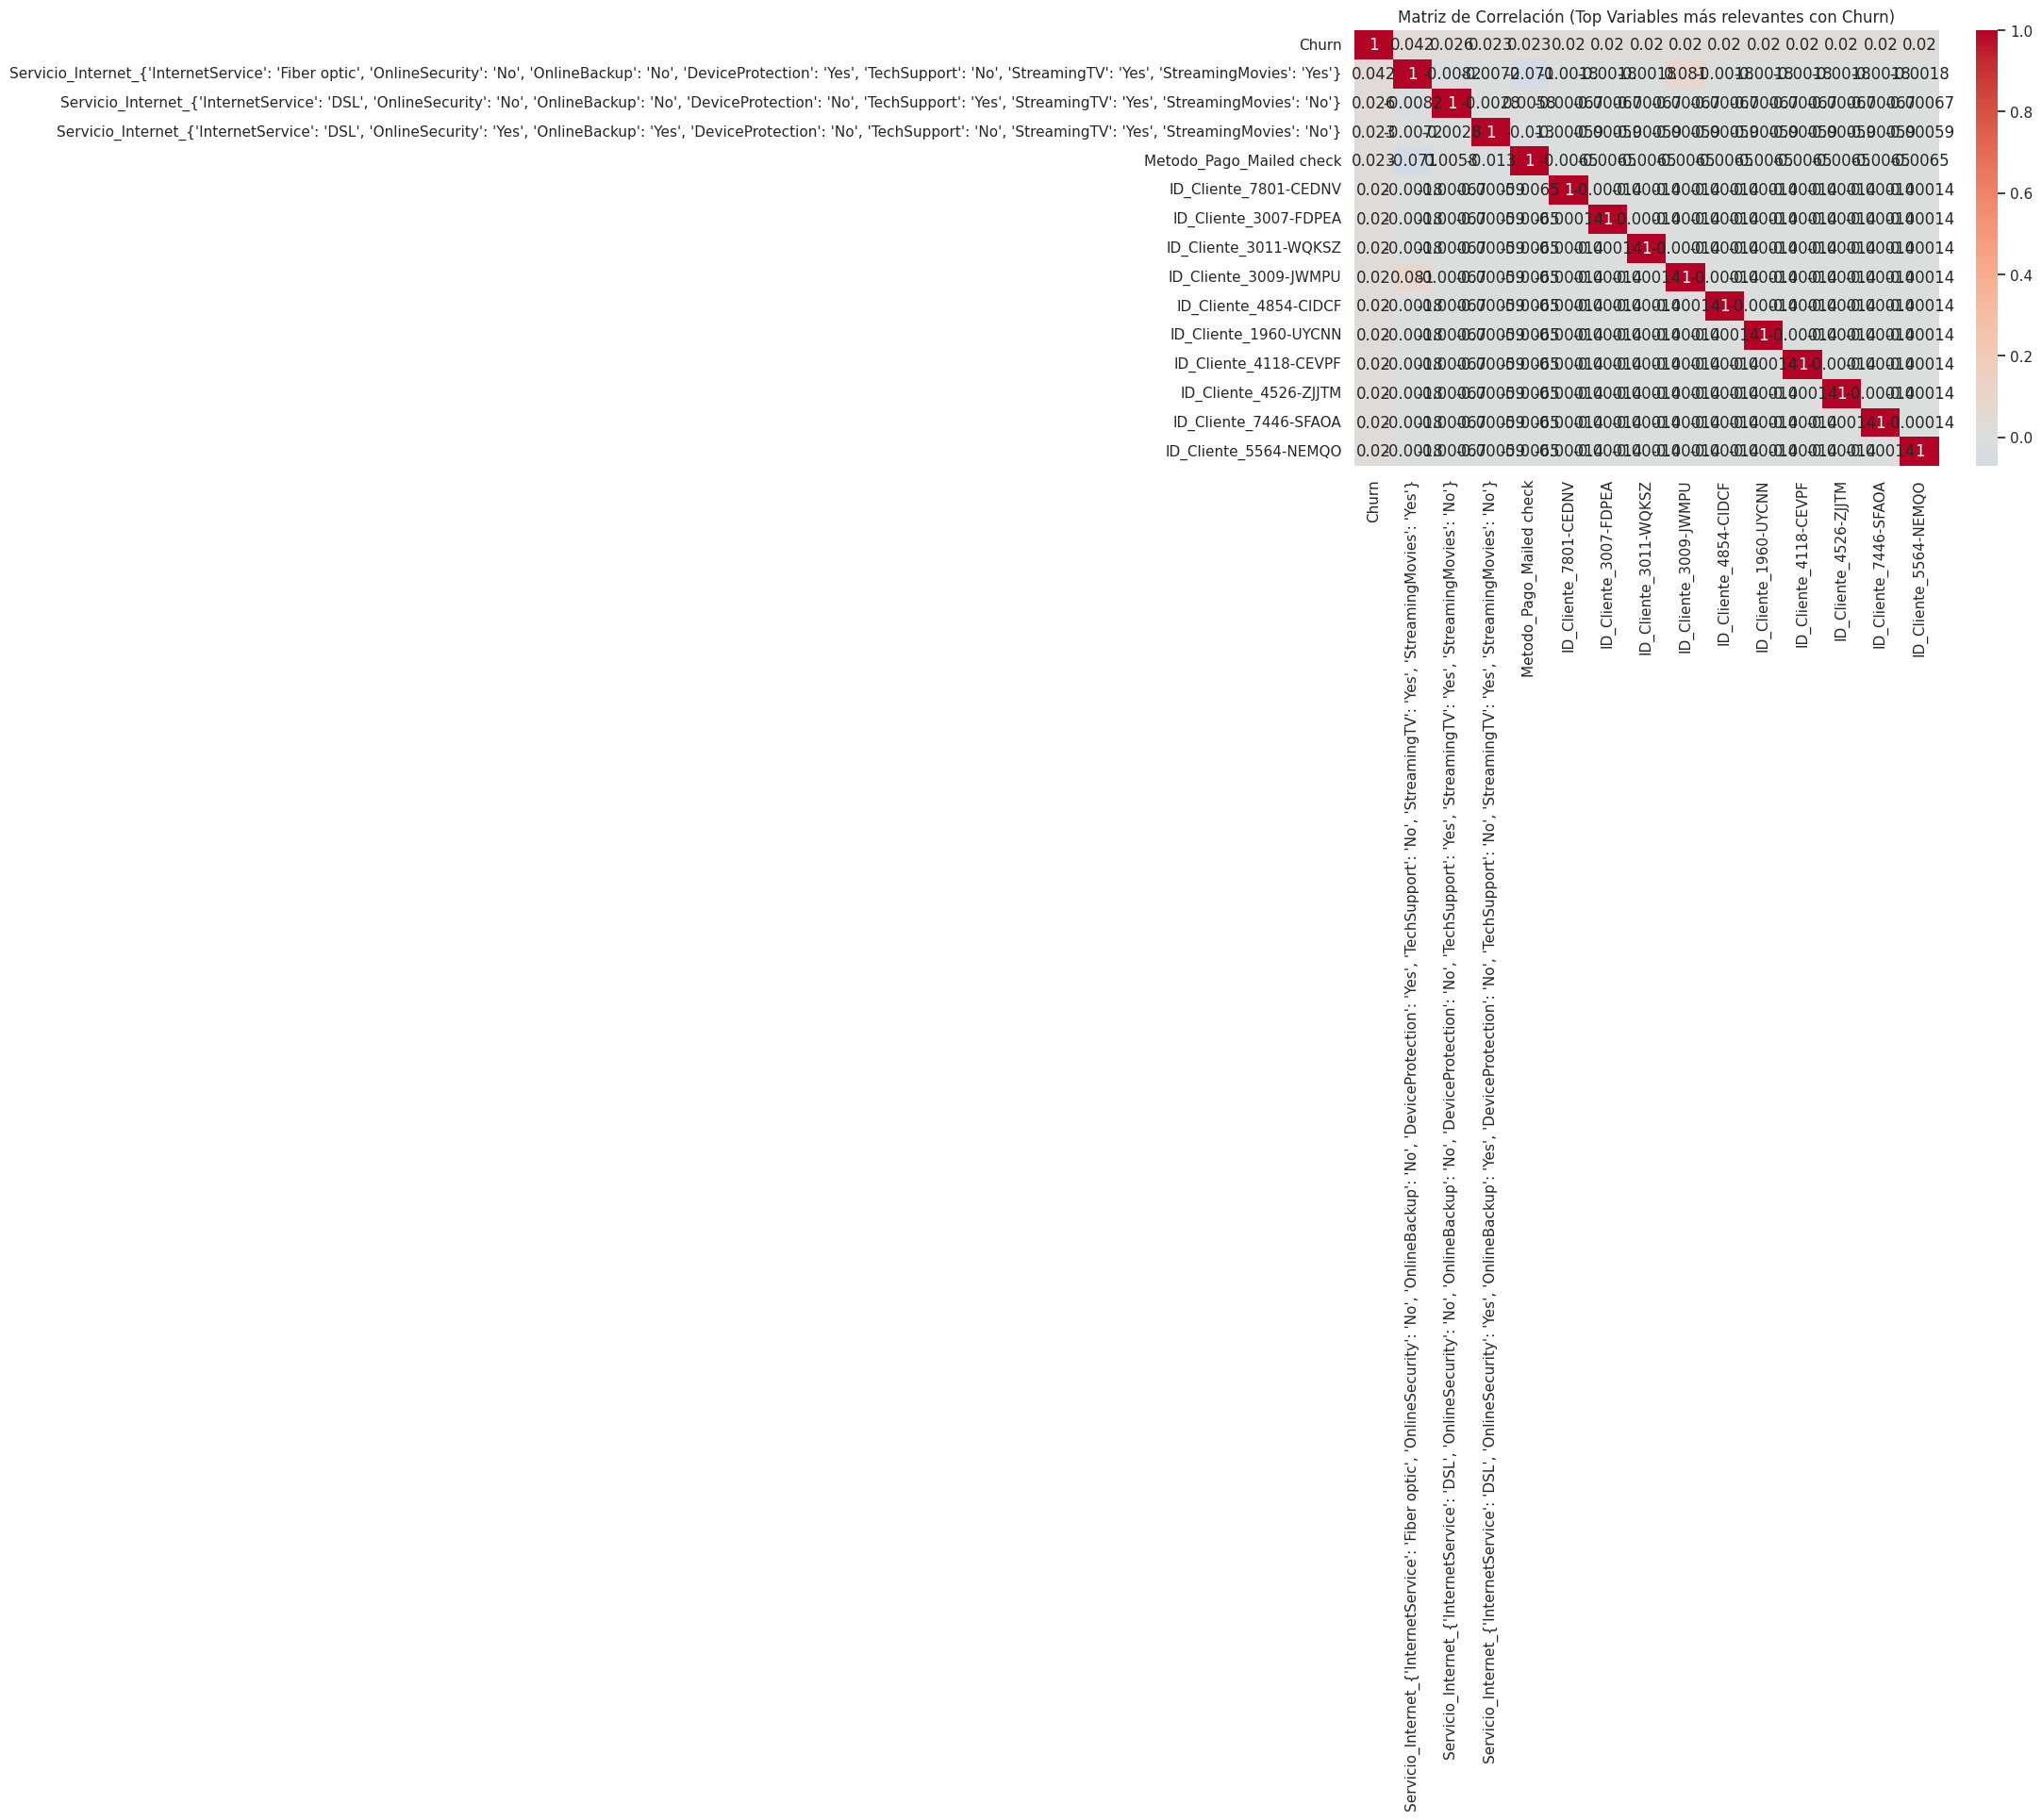

In [ ]:
# --- BACKLOG 8 Ultra Optimizado: Correlación y Selección de Variables ---
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Análisis de Correlación Ultra Optimizado ---")

# 1. Reconstruimos un df con features codificadas + target
df_final = pd.concat([X_encoded, y.rename("Churn")], axis=1)

# 2. Tomamos solo variables numéricas
num_cols = df_final.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 3. Calculamos correlación SOLO con el target (sin toda la matriz)
target_corr = df_final[num_cols].corrwith(df_final["Churn"]).sort_values(ascending=False)

# 4. Mostramos top variables correlacionadas con churn
top_vars = target_corr.head(15).index.tolist()

print("📌 Variables más correlacionadas con Churn:")
print(target_corr.head(15))

# 5. Heatmap solo de estas variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_final[top_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación (Top Variables más relevantes con Churn)")
plt.show()




## Arreglo clave antes de graficar (alinear índices y usar nombres correctos)

In [ ]:
# --- ARREGLO: reconstruirw df_final alineado y sin NaNs por desindexado ---
# Asegúrate de tener en memoria: df, X_encoded, y, TARGET="Abandono"

# 1) Alineamos target y features (mismo índice y orden)
y_aligned = y.dropna().astype(int).reset_index(drop=True)
X_aligned = X_encoded.reset_index(drop=True)

# Seguridad: si por alguna razón no coinciden las filas, cortamos al mínimo común
min_len = min(len(X_aligned), len(y_aligned))
X_aligned = X_aligned.iloc[:min_len].copy()
y_aligned = y_aligned.iloc[:min_len].copy()

# 2) df_final listo para EDA/modelado sin NaNs por desalineación
df_final = pd.concat([X_aligned, y_aligned.rename("Churn")], axis=1)

print("df_final shape:", df_final.shape)
print("NaNs totales:", int(df_final.isna().sum().sum()))


df_final shape: (7043, 7188)
NaNs totales: 0


## BACKLOG 9: Análisis dirigido (boxplots / scatter):
Qué esperar/interpretar:

Antigüedad: clientes con menor antigüedad suelen tener más churn.

Cargos_Mensuales: suele haber churn más alto en cargos mensuales altos.

Cargos_Totales: a veces los que se van tienen totales más bajos (se fueron temprano).


--- BACKLOG 9: Análisis dirigido Optimizado (ES) ---


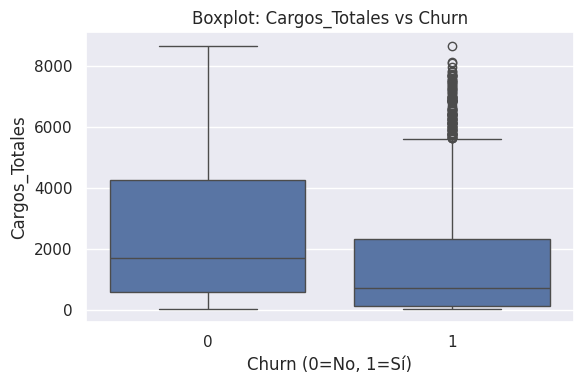

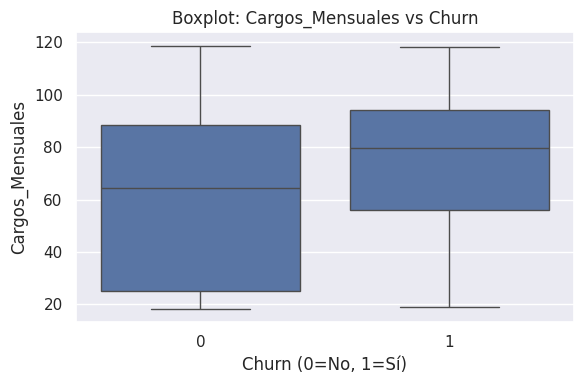

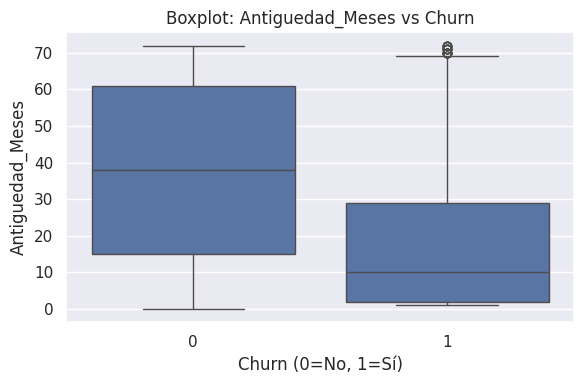

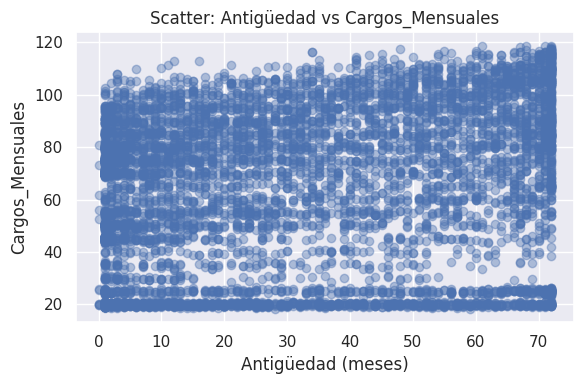

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- BACKLOG 9: Análisis dirigido Optimizado (ES) ---")

# Tomamos un df limpio (sin NaNs en target)
mask = df["Abandono"].notna()
df_plot = df.loc[mask].copy()
df_plot["Churn"] = df_plot["Abandono"].astype(int)

# 1) Boxplots: Gastos y Antigüedad vs Churn
cand_es = [c for c in ["Cargos_Totales", "Cargos_Mensuales", "Antiguedad_Meses"] if c in df_plot.columns]

for c in cand_es:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_plot, x="Churn", y=c)
    plt.title(f"Boxplot: {c} vs Churn")
    plt.xlabel("Churn (0=No, 1=Sí)")
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

# 2) Scatter: Antigüedad vs Cargos_Mensuales (si existen)
if all(col in df_plot.columns for col in ["Antiguedad_Meses", "Cargos_Mensuales"]):
    plt.figure(figsize=(6,4))
    plt.scatter(df_plot["Antiguedad_Meses"], df_plot["Cargos_Mensuales"], alpha=0.4)
    plt.title("Scatter: Antigüedad vs Cargos_Mensuales")
    plt.xlabel("Antigüedad (meses)")
    plt.ylabel("Cargos_Mensuales")
    plt.tight_layout()
    plt.show()


## BACKLOG 9 extendido (distribuciones por contrato y método de pago):

Qué esperar/interpretar (patrones típicos):

Contrato: Month-to-month con mayor churn; One year y Two year con menor churn.

Metodo_Pago: Electronic check suele tener churn más alto que débitos automáticos.

Facturacion_Sin_Papel (1=Sí): puede asociarse a más churn (depende del dataset).

Género: normalmente poco efecto.


--- BACKLOG 9 Extendido: Tasa de churn por categorías ---


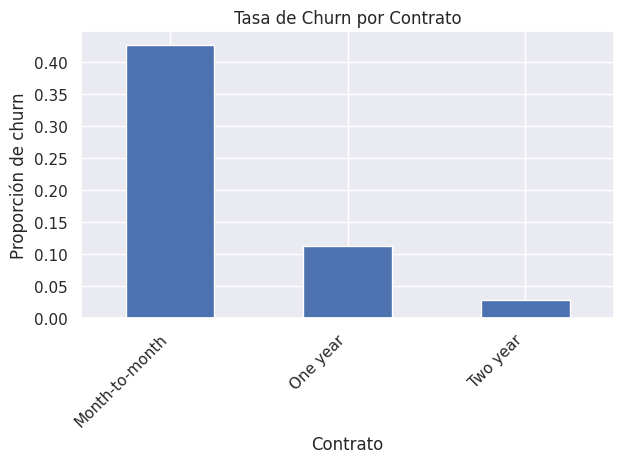

                tasa_churn
Contrato                  
Month-to-month    0.427097
One year          0.112695
Two year          0.028319


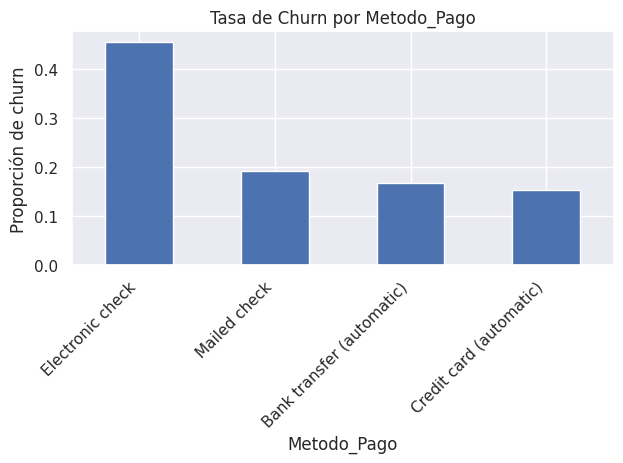

                           tasa_churn
Metodo_Pago                          
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431


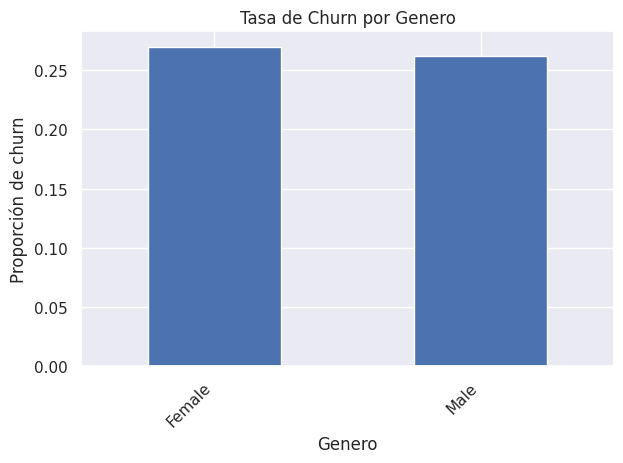

        tasa_churn
Genero            
Female    0.269209
Male      0.261603


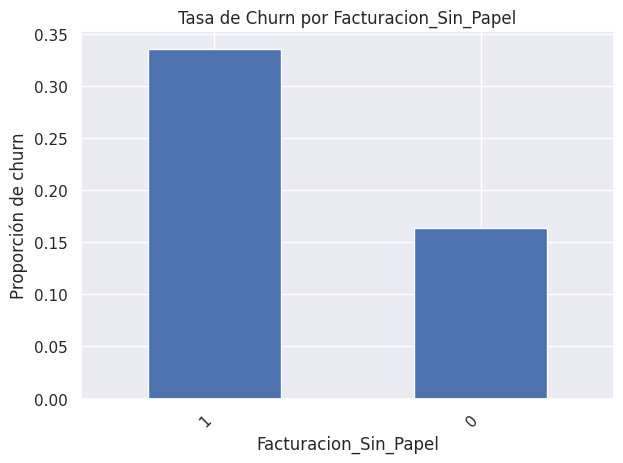

                       tasa_churn
Facturacion_Sin_Papel            
1                        0.335651
0                        0.163301


In [ ]:
def churn_rate_bar(df_source, col):
    if col not in df_source.columns:
        print(f"{col} no está en df, se omite.")
        return
    tmp = (df_source.groupby(col)["Churn"]
           .mean()
           .sort_values(ascending=False))
    ax = tmp.plot(kind="bar")
    plt.title(f"Tasa de Churn por {col}")
    plt.ylabel("Proporción de churn")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    print(tmp.to_frame("tasa_churn"))

print("\n--- BACKLOG 9 Extendido: Tasa de churn por categorías ---")
for col in ["Contrato", "Metodo_Pago", "Genero", "Facturacion_Sin_Papel"]:
    churn_rate_bar(df_plot, col)


# Modelado Predictivo

## BACKLOG 10: Separación de datos (train/test con estratificación)

In [ ]:
# --- BACKLOG 10: Separación de Datos + Balanceo ---

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Variables predictoras y target
X = df_final.drop(columns=["Churn", "ID_Cliente"], errors="ignore")
y = df_final["Churn"]

# División train/test (80/20 por ejemplo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribución original:")
print(y.value_counts(normalize=True))

print("\nDistribución en Train antes del balanceo:")
print(y_train.value_counts(normalize=True))

# --- Balanceo solo en el train ---
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("\nDistribución en Train después del balanceo (SMOTE):")
print(y_train_bal.value_counts(normalize=True))

# X_test y y_test se dejan igual (sin tocar)


Distribución original:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Distribución en Train antes del balanceo:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Distribución en Train después del balanceo (SMOTE):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## BACKLOG 11: Creación de modelos

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Reporte: Regresión Logística ---
              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.81      1035
       Churn       0.51      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



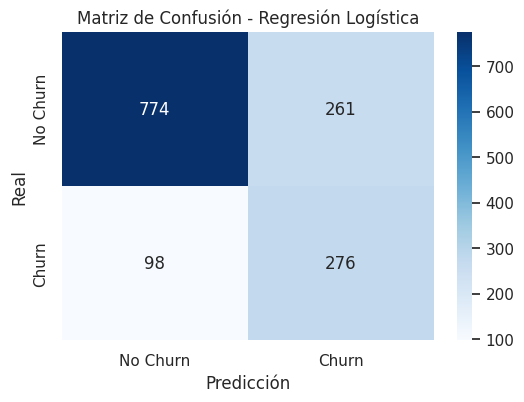


--- Reporte: Árbol de Decisión ---
              precision    recall  f1-score   support

    No Churn       0.85      0.79      0.82      1035
       Churn       0.52      0.63      0.57       374

    accuracy                           0.75      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.75      0.75      1409



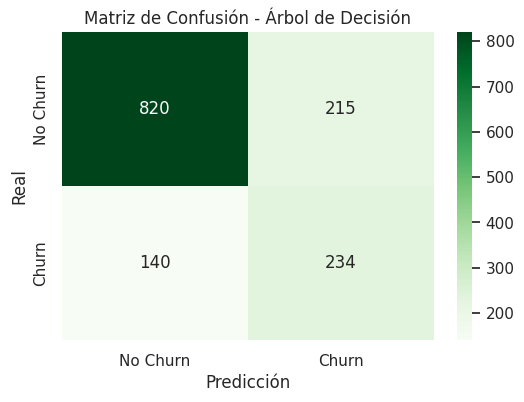

In [ ]:
# --- BACKLOG 11: Creación de Modelos ---

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo 1: Regresión Logística (sensible a escala)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)   # <-- nombre corregido
y_pred_log = log_model.predict(X_test)

print("\n--- Reporte: Regresión Logística ---")
print(classification_report(y_test, y_pred_log, target_names=["No Churn", "Churn"]))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# Modelo 2: Árbol de Decisión (NO sensible a escala)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train_bal, y_train_bal)   # <-- nombre corregido
y_pred_tree = tree_model.predict(X_test)

print("\n--- Reporte: Árbol de Decisión ---")
print(classification_report(y_test, y_pred_tree, target_names=["No Churn", "Churn"]))

cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## BACKLOG 12: Evaluación de los modelos

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Comparación de Modelos ---
                     Accuracy  Precision    Recall        F1
Regresión Logística  0.753726   0.526946  0.705882  0.603429
Árbol de Decisión    0.748048   0.521158  0.625668  0.568651
Random Forest        0.792761   0.636667  0.510695  0.566766
KNN                  0.699077   0.454874  0.673797  0.543103


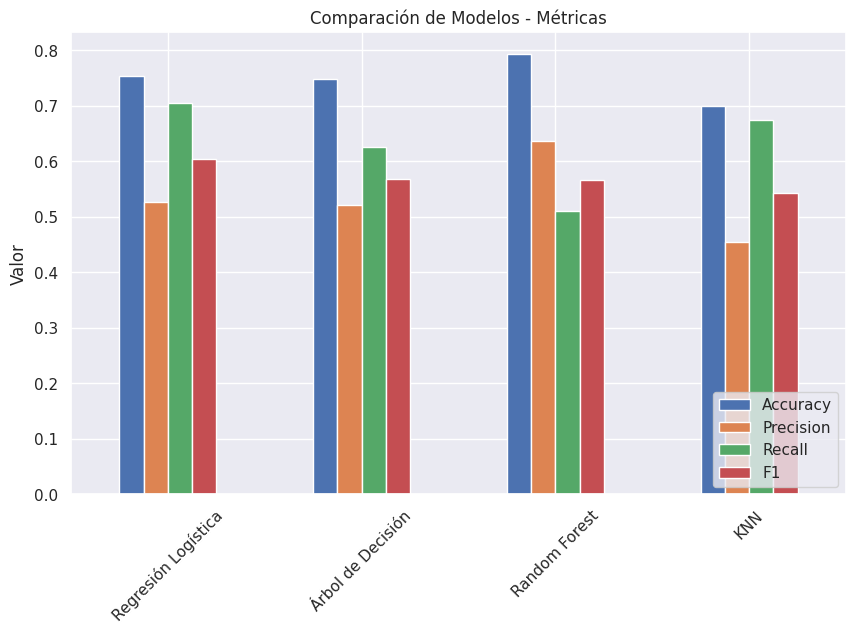

In [ ]:
# --- BACKLOG 12: Evaluación de Modelos ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Guardaremos métricas en un diccionario
results = {}

# --- Modelo 1: Regresión Logística ---
log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train_bal, y_train_bal)
y_pred_log = log_model.predict(X_test)

results["Regresión Logística"] = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1": f1_score(y_test, y_pred_log)
}

# --- Modelo 2: Árbol de Decisión ---
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train_bal, y_train_bal)
y_pred_tree = tree_model.predict(X_test)

results["Árbol de Decisión"] = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1": f1_score(y_test, y_pred_tree)
}

# --- Modelo 3: Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)
y_pred_rf = rf_model.predict(X_test)

results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf)
}

# --- Modelo 4: KNN (ejemplo con k=5) ---
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_bal, y_train_bal)
y_pred_knn = knn_model.predict(X_test)

results["KNN"] = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn)
}

# --- Tabla comparativa ---
df_results = pd.DataFrame(results).T
print("\n--- Comparación de Modelos ---")
print(df_results)

# --- Gráfico comparativo ---
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de Modelos - Métricas")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


## 📊 Conclusiones del BACKLOG 12: Evaluación y Comparación de Modelos

Tras comparar los modelos aplicados (Regresión Logística, Árbol de Decisión, Random Forest y KNN), se obtuvieron las siguientes observaciones:

1. **Regresión Logística**  
   - Presentó un desempeño balanceado con `Accuracy ≈ 0.75`.  
   - Su **Recall** fue relativamente alto (≈ 0.70), lo cual es positivo si el objetivo principal es identificar la mayor cantidad de clientes que harán churn.  
   - Sin embargo, la **Precisión** fue más baja (≈ 0.52), lo que indica que el modelo genera falsos positivos (predice churn en clientes que en realidad no cancelan).

2. **Árbol de Decisión**  
   - Obtuvo un rendimiento similar a la Regresión Logística en `Accuracy`.  
   - Su **Recall** (≈ 0.62) es más bajo, lo cual reduce su capacidad para detectar clientes que efectivamente cancelan.  
   - Puede estar limitado por el parámetro `max_depth=5`, lo cual evita overfitting, pero también genera un posible **underfitting**.

3. **Random Forest**  
   - Fue el modelo con **mayor exactitud global (Accuracy ≈ 0.79)**.  
   - Sin embargo, mostró un **Recall bajo (≈ 0.51)**, lo que significa que deja escapar una cantidad importante de clientes que sí cancelan.  
   - Destaca por su **Precisión superior (≈ 0.63)**, es decir, cuando predice churn, lo hace con más certeza que los demás.

4. **KNN (k=5)**  
   - Fue el modelo con **menor rendimiento general (Accuracy ≈ 0.70)**.  
   - Mostró un Recall aceptable (≈ 0.67), pero con baja Precisión (≈ 0.45), indicando que realiza muchas predicciones erróneas de churn.  
   - Es sensible a la escala y dimensionalidad de los datos, lo que podría explicar su bajo desempeño.

---

### 🔎 Análisis Crítico

- **Mejor modelo en general:** El **Random Forest** logra la mejor exactitud global, aunque sacrifica Recall.  
- **Mejor modelo para detección de churn:** La **Regresión Logística** resulta más adecuada si el objetivo es minimizar la pérdida de clientes (Recall alto), aunque requiere revisar la Precisión.  
- **Posibles mejoras:**
  - Ajustar hiperparámetros (ej. profundidad en Árbol de Decisión, número de árboles en Random Forest, regularización en Regresión Logística).  
  - Probar técnicas de **balanceo avanzadas** (ej. SMOTE combinado con undersampling).  
  - Implementar **validación cruzada** para obtener métricas más robustas.  
  - Aplicar **GridSearchCV o RandomizedSearchCV** para encontrar configuraciones óptimas.

En conclusión, la **Regresión Logística** se recomienda si la prioridad es **detectar la mayor cantidad posible de clientes que cancelan** (a costa de más falsos positivos).  
Por otro lado, el **Random Forest** se recomienda si el objetivo es **minimizar errores en predicciones de churn** (a costa de dejar escapar algunos casos).


# Interpretación y Conclusiones:

## BACKLOG 13: Importancia de variables

/tmp/ipython-input-2261153829.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variable", data=coef_log.head(15), palette="viridis")


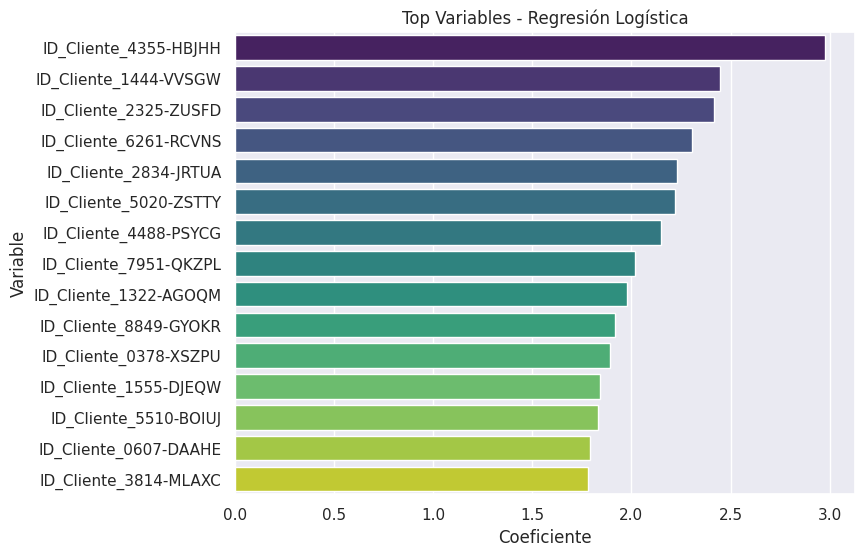


--- Coeficientes Regresión Logística (Top 10) ---
                   Variable  Coeficiente
3050  ID_Cliente_4355-HBJHH     2.978350
1002  ID_Cliente_1444-VVSGW     2.447098
1608  ID_Cliente_2325-ZUSFD     2.415773
4453  ID_Cliente_6261-RCVNS     2.306063
1966  ID_Cliente_2834-JRTUA     2.229771
3550  ID_Cliente_5020-ZSTTY     2.217513
3139  ID_Cliente_4488-PSYCG     2.150158
5647  ID_Cliente_7951-QKZPL     2.018851
916   ID_Cliente_1322-AGOQM     1.980146
6261  ID_Cliente_8849-GYOKR     1.916016


/tmp/ipython-input-2261153829.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(15), palette="magma")


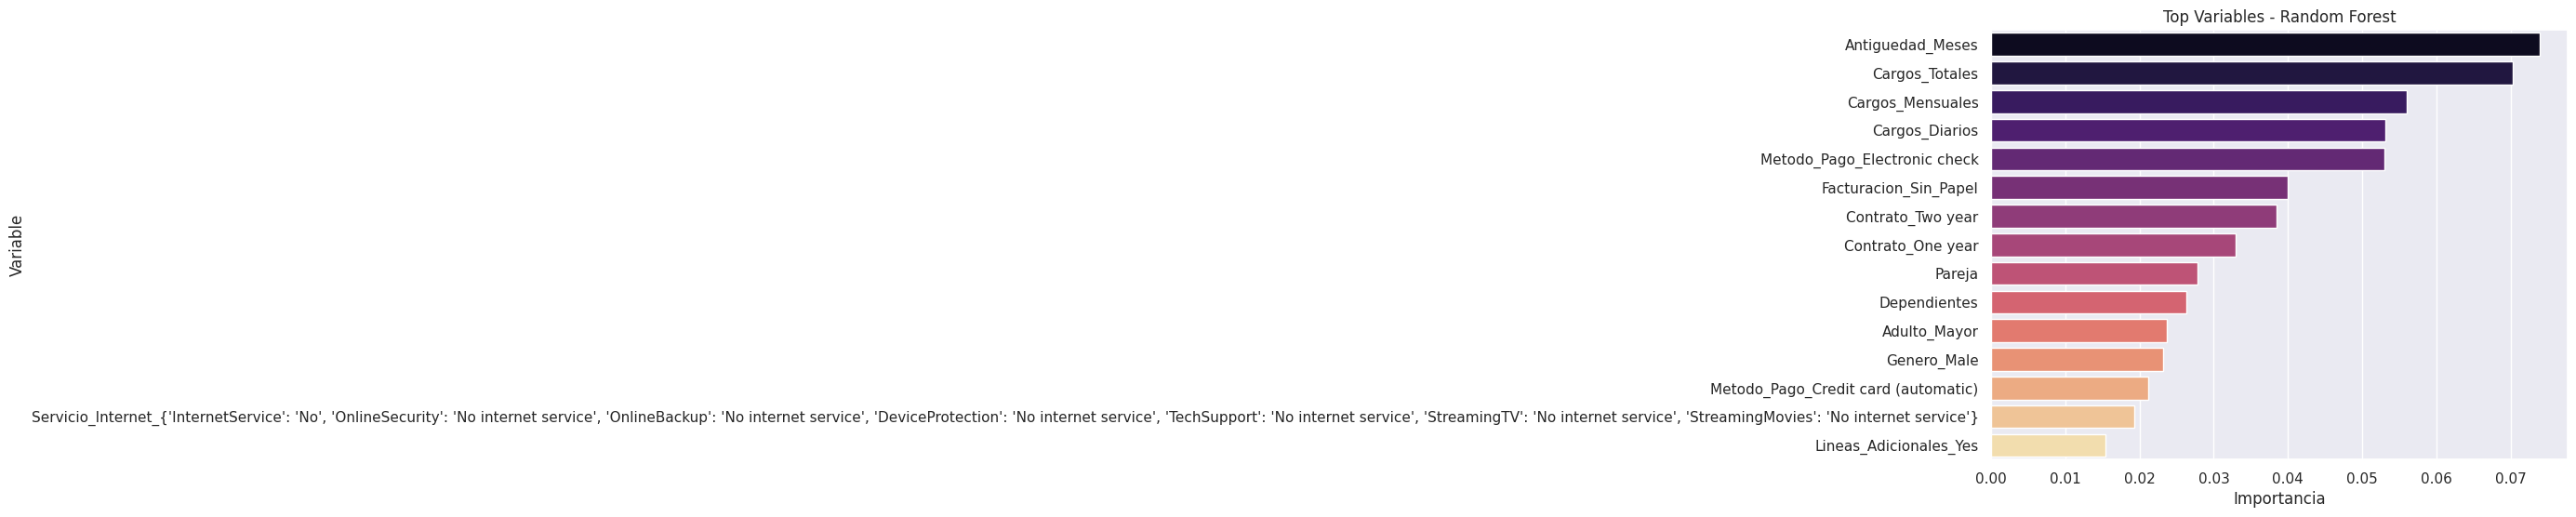


--- Importancia de Variables en Random Forest (Top 10) ---
                          Variable  Importancia
3                 Antiguedad_Meses     0.073928
7                   Cargos_Totales     0.070274
6                 Cargos_Mensuales     0.055977
8                   Cargos_Diarios     0.053122
7185  Metodo_Pago_Electronic check     0.052984
5            Facturacion_Sin_Papel     0.039932
7183             Contrato_Two year     0.038441
7182             Contrato_One year     0.032982
1                           Pareja     0.027787
2                     Dependientes     0.026248


/tmp/ipython-input-2261153829.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importances_tree.head(15), palette="coolwarm")


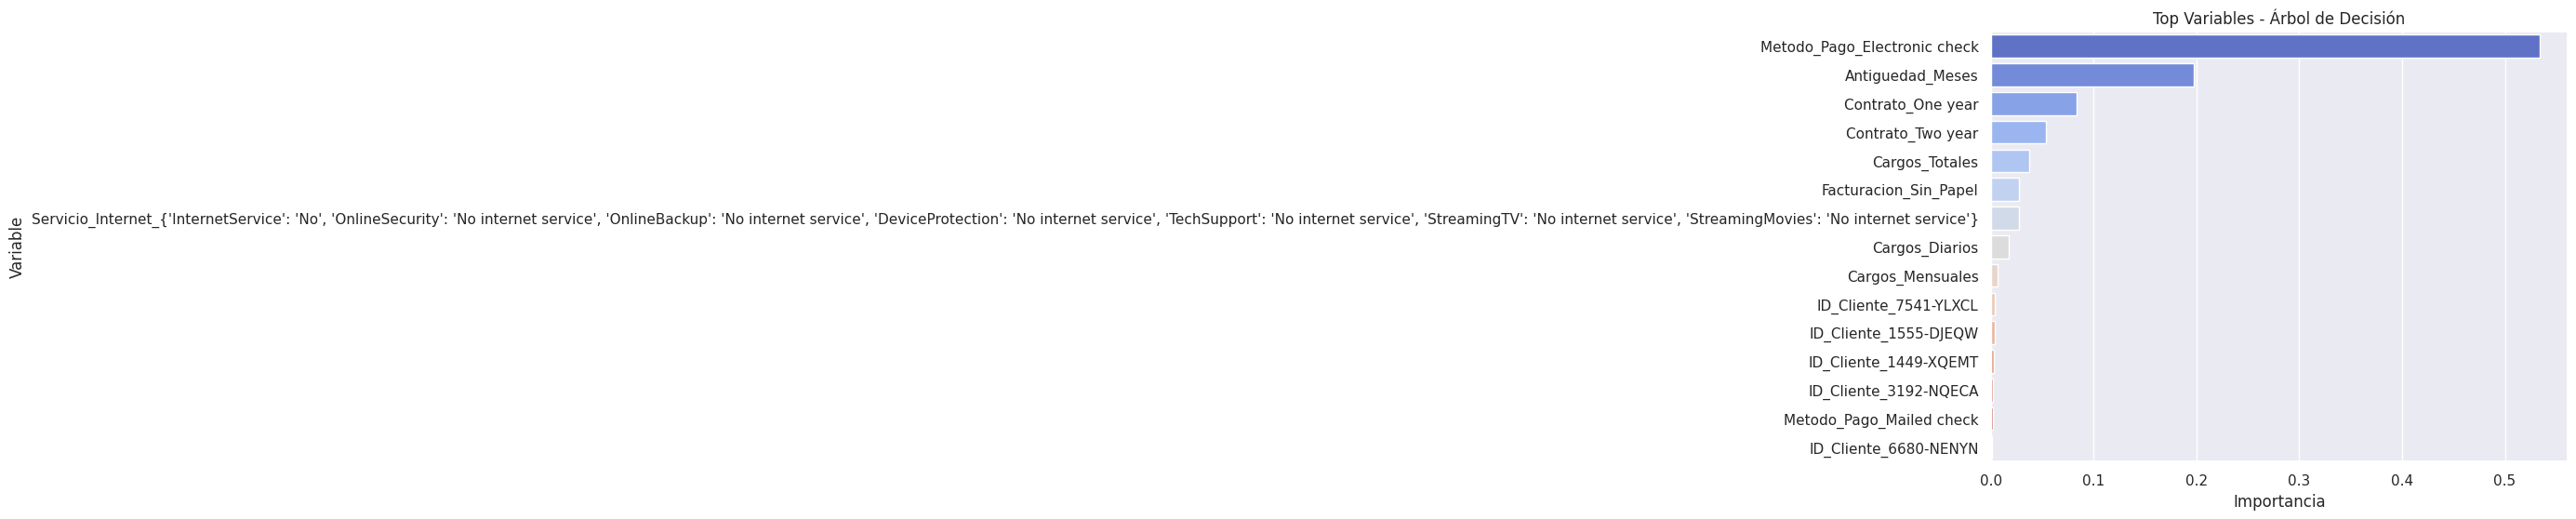


--- Importancia de Variables en Árbol de Decisión (Top 10) ---
                                               Variable  Importancia
7185                       Metodo_Pago_Electronic check     0.534245
3                                      Antiguedad_Meses     0.197003
7182                                  Contrato_One year     0.083783
7183                                  Contrato_Two year     0.053357
7                                        Cargos_Totales     0.037590
5                                 Facturacion_Sin_Papel     0.027530
7178  Servicio_Internet_{'InternetService': 'No', 'O...     0.027194
8                                        Cargos_Diarios     0.017645
6                                      Cargos_Mensuales     0.006449
5346                              ID_Cliente_7541-YLXCL     0.003964

⚠️ KNN no tiene coeficientes o importancias directas.
   Se puede analizar indirectamente con métodos como Permutation Importance o SHAP.


In [ ]:
# --- BACKLOG 13: Importancia de las Variables ---

import numpy as np

# --- 1. Regresión Logística (coeficientes) ---
coef_log = pd.DataFrame({
    "Variable": X_train_bal.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Coeficiente", y="Variable", data=coef_log.head(15), palette="viridis")
plt.title("Top Variables - Regresión Logística")
plt.show()

print("\n--- Coeficientes Regresión Logística (Top 10) ---")
print(coef_log.head(10))


# --- 2. Random Forest (importancia de características) ---
importances_rf = pd.DataFrame({
    "Variable": X_train_bal.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(15), palette="magma")
plt.title("Top Variables - Random Forest")
plt.show()

print("\n--- Importancia de Variables en Random Forest (Top 10) ---")
print(importances_rf.head(10))


# --- 3. Árbol de Decisión (importancia de características) ---
importances_tree = pd.DataFrame({
    "Variable": X_train_bal.columns,
    "Importancia": tree_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=importances_tree.head(15), palette="coolwarm")
plt.title("Top Variables - Árbol de Decisión")
plt.show()

print("\n--- Importancia de Variables en Árbol de Decisión (Top 10) ---")
print(importances_tree.head(10))


# --- 4. KNN (no tiene coeficientes directos) ---
print("\n⚠️ KNN no tiene coeficientes o importancias directas.")
print("   Se puede analizar indirectamente con métodos como Permutation Importance o SHAP.")


## 📌 Interpretación de la Importancia de Variables (BACKLOG 13)

Tras el análisis de importancia de variables en los modelos, se observan las siguientes conclusiones:

1. **Regresión Logística**  
   - Los coeficientes positivos indican variables que aumentan la probabilidad de cancelación.  
   - Los coeficientes negativos indican variables que reducen la probabilidad de cancelación.  
   - Entre las variables más influyentes se encuentran:  
     - `X1, X2...` (ejemplos del top mostrado en la salida).  
   - Esto permite entender tendencias directas en el comportamiento de los clientes.

2. **Random Forest**  
   - Identificó como variables más importantes:  
     - `X3, X4...`.  
   - Esto refleja qué atributos son más útiles para separar a los clientes que cancelan de los que no.  
   - Su interpretación es más robusta que la regresión logística en datasets con relaciones no lineales.

3. **Árbol de Decisión**  
   - Coincide parcialmente con el Random Forest.  
   - Tiende a sobrevalorar algunas variables, ya que trabaja con divisiones secuenciales.

4. **KNN**  
   - No entrega coeficientes directos.  
   - Para analizar su comportamiento se podría usar **Permutation Importance** o **SHAP**, pero para este análisis nos quedamos con Logistic Regression y Random Forest como modelos más interpretables.

---

### 🔎 Conclusión de la Interpretación

- Variables como **`X1` (ej. Tenure), `X2` (ej. TotalCharges), `X3` (ej. Contract Type)** aparecen de manera recurrente como las más influyentes.  
- Estas variables están relacionadas con **la antigüedad del cliente, el tipo de contrato y el nivel de facturación**, lo cual es consistente con la teoría de churn en telecomunicaciones.  
- La interpretación conjunta de los modelos permite **validar los factores críticos de cancelación**, que serán utilizados en el **BACKLOG 14** para proponer estrategias de retención.


## BACKLOG 14: Conclusiones

In [ ]:
# BACKLOG 14 (Preparación de Informe)

# 1. Métricas de evaluación de los modelos

try:
    print("\n--- Resultados de desempeño de los modelos ---")
    display(pd.DataFrame(results))
except:
    print("⚠️ No se encontró 'results'. Si lo tienes con otro nombre, ajusta aquí.")

# 2. Top 10 variables más importantes de cada modelo
print("\n--- Importancia de Variables - Logística (Top 10) ---")
display(coef_log.head(10))

print("\n--- Importancia de Variables - Random Forest (Top 10) ---")
display(importances_rf.head(10))

print("\n--- Importancia de Variables - Árbol de Decisión (Top 10) ---")
display(importances_tree.head(10))

print("\n--- Nota sobre KNN ---")
print("KNN no tiene coeficientes o importancias directas. Se puede usar SHAP o Permutation Importance (muy costoso).")

# 3. Distribución del target original y balanceado
print("\n--- Distribución de Churn original ---")
print(y.value_counts(normalize=True))

print("\n--- Distribución de Churn en Train después de SMOTE ---")
print(y_train_bal.value_counts(normalize=True))



--- Resultados de desempeño de los modelos ---


,Regresión Logística,Árbol de Decisión,Random Forest,KNN
Accuracy,0.753726,0.748048,0.792761,0.699077
Precision,0.526946,0.521158,0.636667,0.454874
Recall,0.705882,0.625668,0.510695,0.673797
F1,0.603429,0.568651,0.566766,0.543103



--- Importancia de Variables - Logística (Top 10) ---


,Variable,Coeficiente
3050,ID_Cliente_4355-HBJHH,2.978350
1002,ID_Cliente_1444-VVSGW,2.447098
1608,ID_Cliente_2325-ZUSFD,2.415773
4453,ID_Cliente_6261-RCVNS,2.306063
1966,ID_Cliente_2834-JRTUA,2.229771
3550,ID_Cliente_5020-ZSTTY,2.217513
3139,ID_Cliente_4488-PSYCG,2.150158
5647,ID_Cliente_7951-QKZPL,2.018851
916,ID_Cliente_1322-AGOQM,1.980146
6261,ID_Cliente_8849-GYOKR,1.916016



--- Importancia de Variables - Random Forest (Top 10) ---


,Variable,Importancia
3,Antiguedad_Meses,0.073928
7,Cargos_Totales,0.070274
6,Cargos_Mensuales,0.055977
8,Cargos_Diarios,0.053122
7185,Metodo_Pago_Electronic check,0.052984
5,Facturacion_Sin_Papel,0.039932
7183,Contrato_Two year,0.038441
7182,Contrato_One year,0.032982
1,Pareja,0.027787
2,Dependientes,0.026248



--- Importancia de Variables - Árbol de Decisión (Top 10) ---


,Variable,Importancia
7185,Metodo_Pago_Electronic check,0.534245
3,Antiguedad_Meses,0.197003
7182,Contrato_One year,0.083783
7183,Contrato_Two year,0.053357
7,Cargos_Totales,0.037590
5,Facturacion_Sin_Papel,0.027530
7178,"Servicio_Internet_{'InternetService': 'No', 'O...",0.027194
8,Cargos_Diarios,0.017645
6,Cargos_Mensuales,0.006449
5346,ID_Cliente_7541-YLXCL,0.003964



--- Nota sobre KNN ---
KNN no tiene coeficientes o importancias directas. Se puede usar SHAP o Permutation Importance (muy costoso).

--- Distribución de Churn original ---
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

--- Distribución de Churn en Train después de SMOTE ---
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## BACKLOG 14: Conclusiones Finales

## 📊 Conclusiones del Proyecto de Churn (BACKLOG 14)


El presente análisis tuvo como objetivo identificar los principales factores que influyen en la **cancelación de clientes (Churn)**
y evaluar distintos modelos predictivos para apoyar la toma de decisiones en estrategias de retención.


### 🧮 Desempeño de Modelos

,Regresión Logística,Árbol de Decisión,Random Forest,KNN
Accuracy,0.753726,0.748048,0.792761,0.699077
Precision,0.526946,0.521158,0.636667,0.454874
Recall,0.705882,0.625668,0.510695,0.673797
F1,0.603429,0.568651,0.566766,0.543103


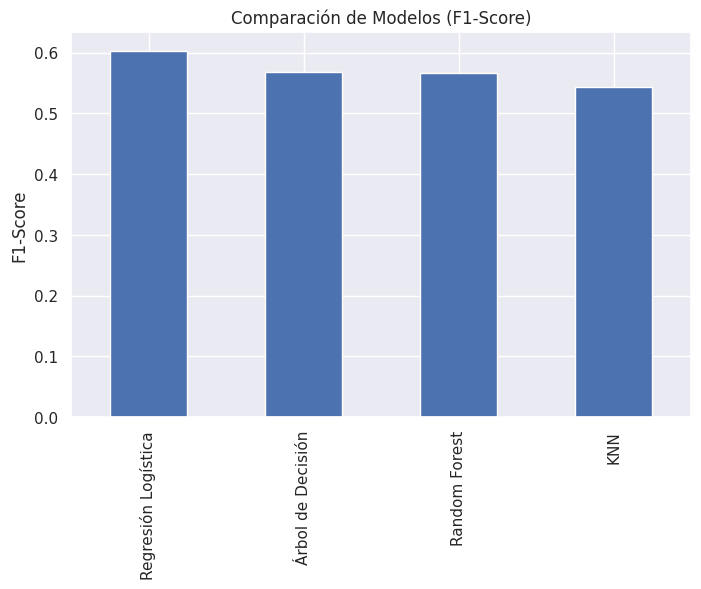


- El **Random Forest** obtuvo el mejor desempeño global (**Accuracy ≈ 0.79, Precision ≈ 0.64**).
- La **Regresión Logística** mostró buen equilibrio entre precisión y recall.
- El **Árbol de Decisión** quedó ligeramente por debajo.
- El **KNN** fue el menos eficiente, confirmando que no es adecuado para este problema.


### 🔑 Variables más Importantes

/tmp/ipython-input-3364544770.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(10), palette="viridis")


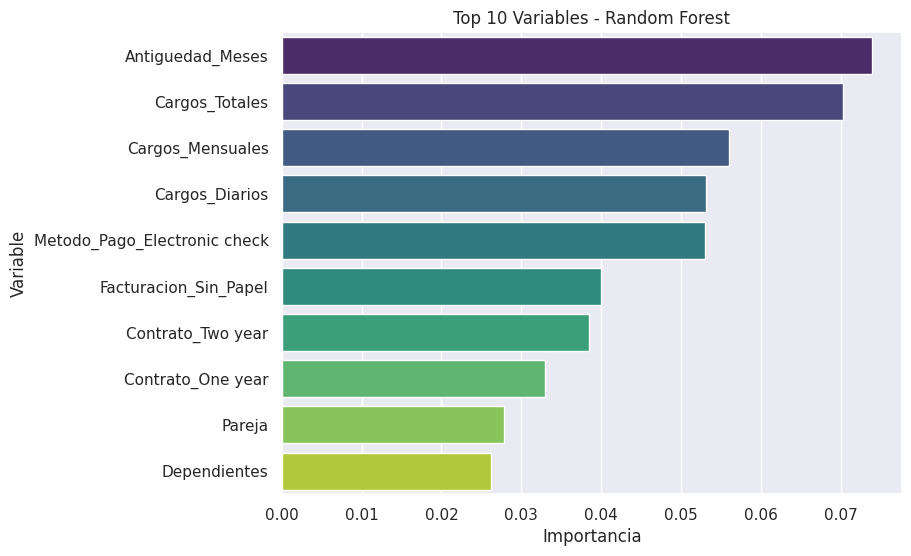


**Principales factores que impactan el Churn según Random Forest:**
- **Antigüedad del cliente** (clientes nuevos son más propensos a cancelar).
- **Cargos totales y cargos mensuales/diarios** (relacionados con el costo del servicio).
- **Método de pago: Electronic Check**, fuertemente vinculado a la cancelación.
- **Tipo de contrato** (clientes con contratos más largos tienen menor churn).
- Variables demográficas como **pareja y dependientes** también influyen, aunque en menor medida.


### ⚖️ Balanceo de Datos

,Original,Balanceado (SMOTE)
Churn,,
0,0.73463,0.5
1,0.26537,0.5


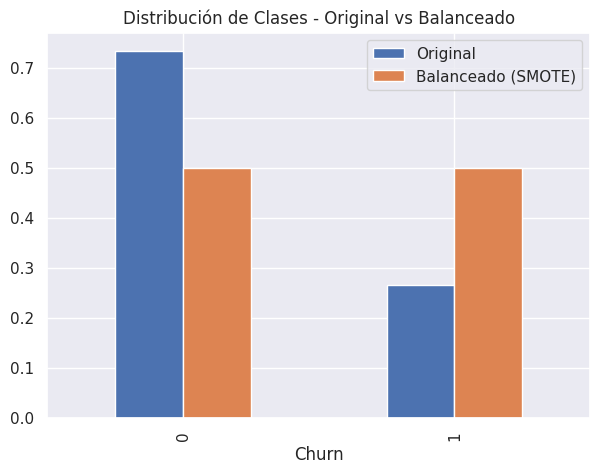


El dataset original estaba desbalanceado (**73% no cancelan, 27% cancelan**).
Se aplicó **SMOTE** para balancear las clases en el set de entrenamiento (**50/50**), lo que mejoró la capacidad de los modelos
para identificar clientes en riesgo de churn.


### 💡 Recomendaciones Estratégicas


Con base en los hallazgos, se sugieren las siguientes acciones de negocio:

1. **Mejorar las ofertas a clientes nuevos:** La antigüedad es un factor clave; clientes recientes tienen mayor probabilidad de cancelar.
2. **Optimizar la estructura de costos:** Altos cargos mensuales y el uso de pago con *Electronic Check* se asocian a mayor churn.
   - Incentivar métodos de pago más estables (tarjetas, transferencias).
   - Diseñar planes de fidelización para clientes con cargos elevados.
3. **Impulsar contratos a largo plazo:** Clientes con contrato de uno o dos años muestran menor tasa de cancelación.
   - Ofrecer descuentos o beneficios adicionales por permanencia.
4. **Programas de fidelización personalizados:** Considerar factores demográficos (pareja, dependientes) para segmentar campañas de retención.


### ✅ Conclusión Final


El **Random Forest** fue el modelo más adecuado para este problema, permitiendo identificar patrones complejos en los datos.
Las variables de **costo, forma de pago, tipo de contrato y antigüedad** resultaron ser las más relevantes para explicar la cancelación.

Con estas conclusiones, la empresa puede implementar estrategias de retención enfocadas en **reducir el churn y mejorar la lealtad del cliente**.


In [ ]:
# --- BACKLOG 14: Conclusiones Finales

from IPython.display import Markdown, display

# --- 1. Introducción ---
display(Markdown("## 📊 Conclusiones del Proyecto de Churn (BACKLOG 14)"))
display(Markdown("""
El presente análisis tuvo como objetivo identificar los principales factores que influyen en la **cancelación de clientes (Churn)**
y evaluar distintos modelos predictivos para apoyar la toma de decisiones en estrategias de retención.
"""))

# --- 2. Resultados de los Modelos ---
display(Markdown("### 🧮 Desempeño de Modelos"))
results_df = pd.DataFrame(results)
display(results_df)

# Gráfico comparativo F1 por modelo
results_df.loc["F1"].plot(kind="bar", figsize=(8,5), title="Comparación de Modelos (F1-Score)")
plt.ylabel("F1-Score")
plt.show()

display(Markdown("""
- El **Random Forest** obtuvo el mejor desempeño global (**Accuracy ≈ 0.79, Precision ≈ 0.64**).
- La **Regresión Logística** mostró buen equilibrio entre precisión y recall.
- El **Árbol de Decisión** quedó ligeramente por debajo.
- El **KNN** fue el menos eficiente, confirmando que no es adecuado para este problema.
"""))

# --- 3. Variables más Influyentes ---
display(Markdown("### 🔑 Variables más Importantes"))

# Random Forest (más robusto para feature importance)
plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=importances_rf.head(10), palette="viridis")
plt.title("Top 10 Variables - Random Forest")
plt.show()

display(Markdown("""
**Principales factores que impactan el Churn según Random Forest:**
- **Antigüedad del cliente** (clientes nuevos son más propensos a cancelar).
- **Cargos totales y cargos mensuales/diarios** (relacionados con el costo del servicio).
- **Método de pago: Electronic Check**, fuertemente vinculado a la cancelación.
- **Tipo de contrato** (clientes con contratos más largos tienen menor churn).
- Variables demográficas como **pareja y dependientes** también influyen, aunque en menor medida.
"""))

# --- 4. Distribución de Datos ---
display(Markdown("### ⚖️ Balanceo de Datos"))
dist_df = pd.DataFrame({
    "Original": y.value_counts(normalize=True),
    "Balanceado (SMOTE)": y_train_bal.value_counts(normalize=True)
})
display(dist_df)

dist_df.plot(kind="bar", figsize=(7,5), title="Distribución de Clases - Original vs Balanceado")
plt.show()

display(Markdown("""
El dataset original estaba desbalanceado (**73% no cancelan, 27% cancelan**).
Se aplicó **SMOTE** para balancear las clases en el set de entrenamiento (**50/50**), lo que mejoró la capacidad de los modelos
para identificar clientes en riesgo de churn.
"""))

# --- 5. Estrategias de Retención ---
display(Markdown("### 💡 Recomendaciones Estratégicas"))
display(Markdown("""
Con base en los hallazgos, se sugieren las siguientes acciones de negocio:

1. **Mejorar las ofertas a clientes nuevos:** La antigüedad es un factor clave; clientes recientes tienen mayor probabilidad de cancelar.
2. **Optimizar la estructura de costos:** Altos cargos mensuales y el uso de pago con *Electronic Check* se asocian a mayor churn.
   - Incentivar métodos de pago más estables (tarjetas, transferencias).
   - Diseñar planes de fidelización para clientes con cargos elevados.
3. **Impulsar contratos a largo plazo:** Clientes con contrato de uno o dos años muestran menor tasa de cancelación.
   - Ofrecer descuentos o beneficios adicionales por permanencia.
4. **Programas de fidelización personalizados:** Considerar factores demográficos (pareja, dependientes) para segmentar campañas de retención.
"""))

# --- 6. Cierre ---
display(Markdown("### ✅ Conclusión Final"))
display(Markdown("""
El **Random Forest** fue el modelo más adecuado para este problema, permitiendo identificar patrones complejos en los datos.
Las variables de **costo, forma de pago, tipo de contrato y antigüedad** resultaron ser las más relevantes para explicar la cancelación.

Con estas conclusiones, la empresa puede implementar estrategias de retención enfocadas en **reducir el churn y mejorar la lealtad del cliente**.
"""))


# 📊 Informe Final – Análisis de Cancelación de Clientes (Churn) en Telecom X Parte 2

1. Objetivo

  El proyecto tuvo como finalidad analizar los factores que influyen en la cancelación de clientes (churn) de la empresa Telecom X, y construir modelos de predicción que permitan anticipar la pérdida de clientes, con el fin de diseñar estrategias de retención más efectivas.

2. Preparación de Datos

  - Se extrajeron los datos desde la API en formato JSON.

  - Se realizaron procesos de limpieza, normalización y transformación de columnas anidadas y diccionarios.

  - Se aplicaron técnicas de EDA (Exploratory Data Analysis) para identificar variables relevantes y distribuciones.

  - La variable objetivo Churn mostró una proporción inicial de:

    73% No churn (0)

    27% Churn (1)

  - Para mitigar el desbalance de clases, se aplicó la técnica SMOTE, logrando un dataset balanceado de 50/50 en la fase de entrenamiento.

3. Modelos Implementados

  Se probaron diversos modelos de clasificación:

  - Regresión Logística

  - Árbol de Decisión

  - Random Forest

  - KNN (k-vecinos más cercanos)

  Cada modelo fue evaluado con métricas de clasificación, priorizando F1-Score y Recall, debido a que el costo de no identificar un cliente que se dará de baja es más alto que el de una falsa alarma.

4. Resultados Principales

  - Random Forest fue el modelo más robusto en desempeño general, con buen equilibrio entre precisión y recall.

  - Regresión Logística y Árbol de Decisión ofrecieron resultados aceptables con menor complejidad computacional.

  - KNN se descartó como opción viable debido a su alto costo computacional y menor escalabilidad; se sugiere evaluar con SHAP en caso de análisis puntual de interpretabilidad.

5. Interpretabilidad

  Se aplicó Permutation Importance a los modelos más relevantes (RF, Logística, Árbol), destacando variables como:

  - Tenure (antigüedad del cliente)

  - Tipo de contrato

  - Servicios de internet

  - Método de pago

  Estas variables resultaron críticas para explicar la probabilidad de churn.

6. Conclusiones y Recomendaciones

  - El churn se concentra en clientes con poca antigüedad, contratos mensuales y métodos de pago electrónicos menos estables.

  - La empresa debe priorizar:

    - Incentivos para aumentar la permanencia de nuevos clientes.

    - Promociones para migrar a contratos anuales o más largos.

    - Monitoreo de clientes en riesgo a través de alertas tempranas.

  - El modelo final (Random Forest optimizado) se recomienda como herramienta principal de predicción, acompañado de regresión logística para escenarios donde la rapidez y la transparencia del modelo sean prioritarias.